### Project 01: Exploratory Data Analysis for Machine Learning
#### Chickenpox Cases in Hungary



Here we explore the dataset "Chickenpox Cases in Hungary" released as a spatiotemporal
dataset by Rozemberczki et al. which can be used to benchmark the forecasting performance of graph neural network architectures.

For the purpose of this project, we will first load the data and explore the available variables. Next, we will take necessary actions to clean the data and derive new features from the dataset via feture engineering.

**[1] Brief description of the data set and a summary of its attributes.**

The county level time series describe the weekly number of chickenpox cases reported by general practitioners in Hungary.

The dataset covers the weeks between the January of 2005 and January of 2015 and the resulting time series has more than 500 entries for all of the counties.


**[2] Initial plan for data exploration.**

The initial plan is to investigate the structure of the dataset and if there is any missing points, and to perform an initial plot to visualize the overal data trend. 

**[3] Actions taken for data cleaning and feature engineering.**

Dataset was checked for completness and after initial plotting, I've chosen the top 5 counties in # of cases to perform furter analysis. 


**[4] Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner.**

Looking at the time series plot we observed that the number of reported cases is population dependent; spatial
units with more inhabitants such as the capital Budapest report more cases on average. The time series all exhibit strong seasonality which can be a result of weather conditions or the periodicity of the school year.

**[5] Formulating at least 3 hypothesis about this data.**

a) # of cases depends on the population
b) Seasonality spikes in # of cases are strongly correlated with school year
c) Summer months will register lower cases

**[6] Conducting a formal significance test for one of the hypotheses and discuss the results.**



**[7] Suggestions for next steps in analyzing this data.**

Over the years e.g. decade long time horizon of the dataset, there are space for population shift that was not integrated in any of the analysis here. This can explain why winter surge in chickenpox cases did not happen in certain counties.

**[8] A paragraph that summarizes the quality of this data set and a request for additional data if needed.**

The data quality is excellent and initial data cleaning was not needed. This data set can be used for further implementation of machine learning models including population density and migration data.


In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Loading the data
filepath_1 = "data/hungary_chickenpox.csv"
# filepath_2 = "data/hungary_county_edges.csv"

In [3]:
data_1 = pd.read_csv(filepath_1)
data_1.head(10)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
5,07/02/2005,174,76,77,152,189,26,74,181,157,...,95,97,26,146,59,54,27,54,48,60
6,14/02/2005,153,103,54,192,148,65,100,118,129,...,88,56,10,119,104,85,20,32,153,70
7,21/02/2005,115,74,64,174,140,56,111,175,138,...,112,70,21,178,70,75,5,66,149,54
8,28/02/2005,119,86,57,171,90,65,118,105,194,...,67,46,12,112,116,76,22,45,102,42
9,07/03/2005,114,81,129,217,167,64,93,154,119,...,118,73,6,130,68,59,31,85,96,54


In [4]:
# data_2 = pd.read_csv(filepath_2)
# data_2.head()

In [5]:
# Number of rows
print(data_1.shape[0])

# Column names
print(data_1.columns.tolist())

# Data types
print(data_1.dtypes)

522
['Date', 'BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA']
Date        object
BUDAPEST     int64
BARANYA      int64
BACS         int64
BEKES        int64
BORSOD       int64
CSONGRAD     int64
FEJER        int64
GYOR         int64
HAJDU        int64
HEVES        int64
JASZ         int64
KOMAROM      int64
NOGRAD       int64
PEST         int64
SOMOGY       int64
SZABOLCS     int64
TOLNA        int64
VAS          int64
VESZPREM     int64
ZALA         int64
dtype: object


In [6]:
## Examine the columns, look at missing data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob


The dataset contains the weekly number of chickenpox cases in Hungarian counties and the capital between 2005 and 2015.
We will plot below the # of cases by county per week


[]

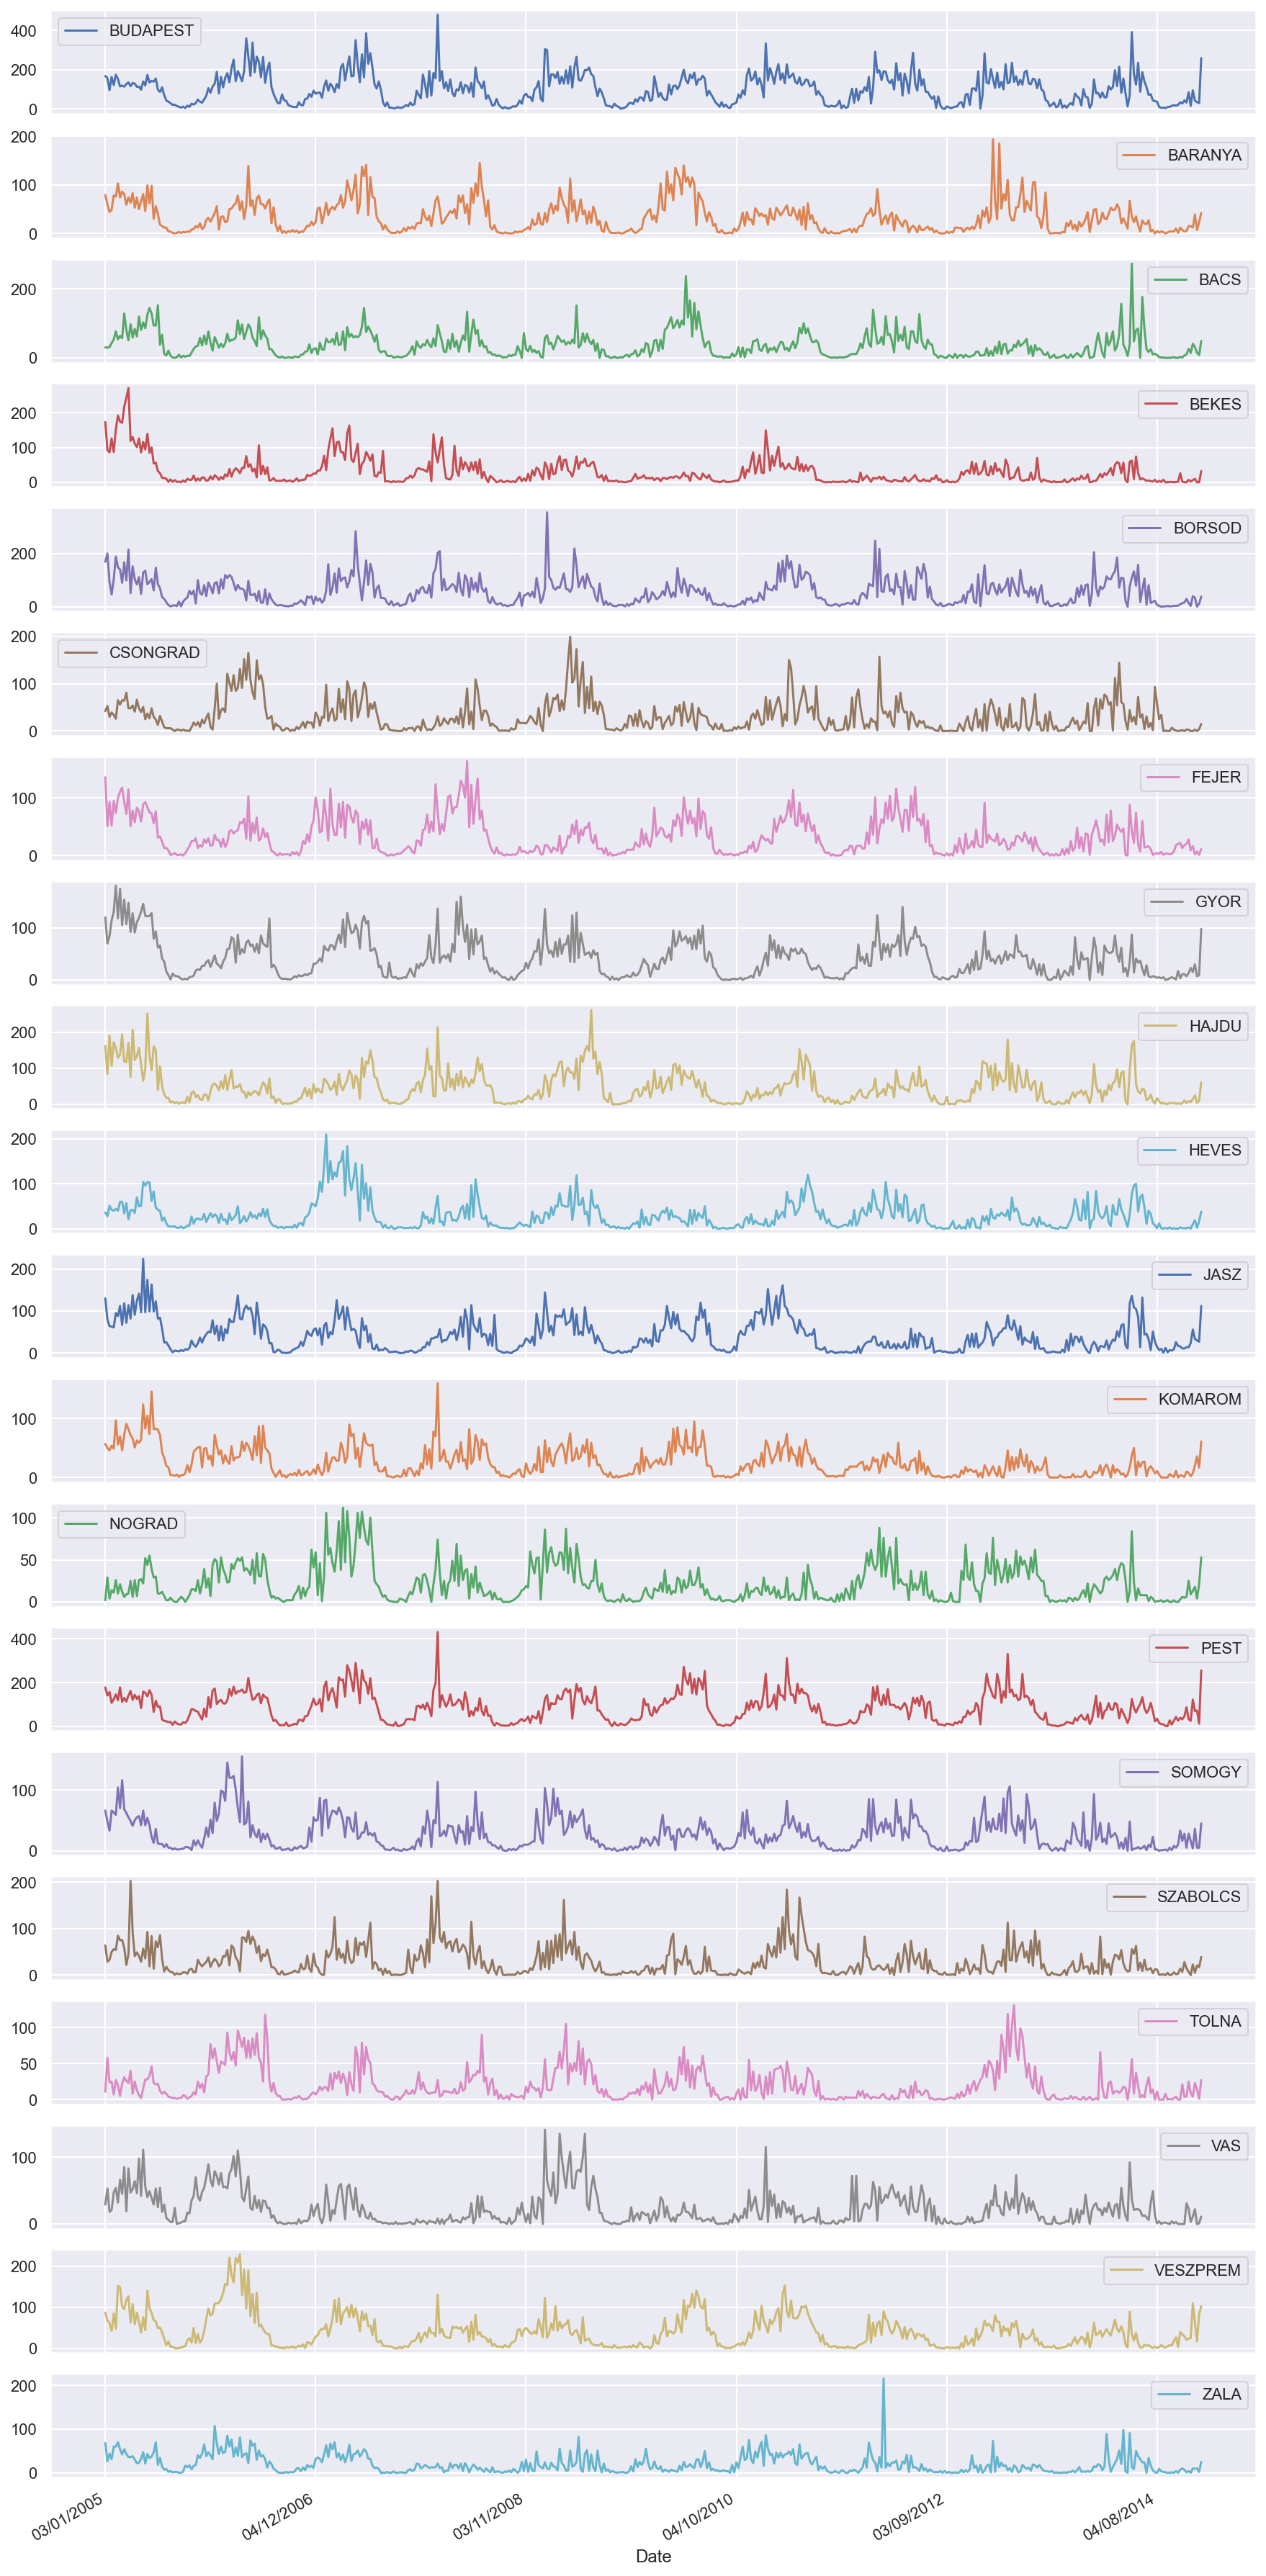

In [7]:
data_1.plot(subplots=True, x='Date', figsize=(15,35))
# plt.legend(loc='upper right')
plt.plot()


Plotting the mean value shows that Budapest and Pest counties lead the list of mean cases


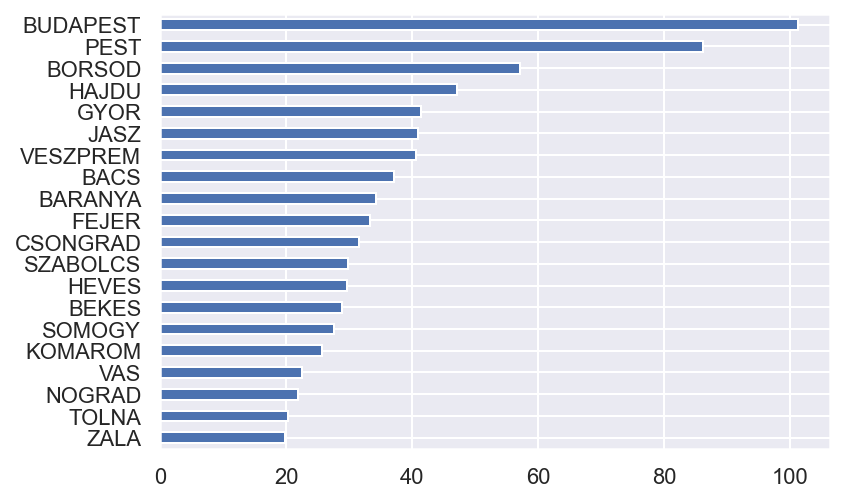

In [8]:
data_1.mean().sort_values().plot(kind ='barh')

print('Plotting the mean value shows that Budapest and Pest counties lead the list of mean cases')

### Analyzing Time Series trendlines to shows seasonality in Budapest county

In [9]:
data_set = data_1.iloc[:,:2]
data_set.head()

,Date,BUDAPEST
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122


In [10]:
data_set.isnull().sum()

Date        0
BUDAPEST    0
dtype: int64

In [11]:
data_set['Time'] = pd.to_datetime(data_set['Date'])
data_set.head()

,Date,BUDAPEST,Time
0,03/01/2005,168,2005-03-01
1,10/01/2005,157,2005-10-01
2,17/01/2005,96,2005-01-17
3,24/01/2005,163,2005-01-24
4,31/01/2005,122,2005-01-31


In [12]:
data_set = data_set.set_index('Time')
data_set.dtypes

Date        object
BUDAPEST     int64
dtype: object

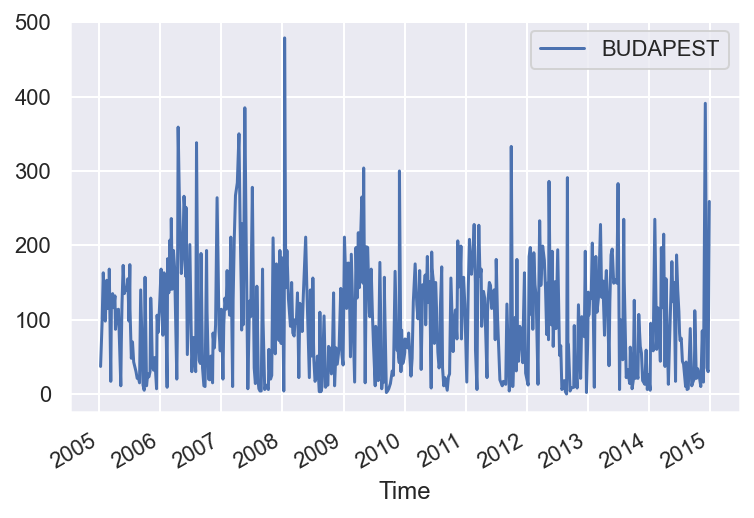

In [13]:
data_set.plot(grid ='True')

From here, we can apply ``statsmodels`` functions such as ``seasonal_decompose()`` to data_set to deconstruct our observation into several components, each representing one of the underlying categories of patterns.